Klasyfikacja zbioru win :-) Dane znajduja się pod https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data, natomiast opis do nich jest https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names. Należy:

1. wczytać dane,
2. nazwać kolumny (korzystając z opisu),
3. sprawdzić jakie są parametry klasyfikatorów LDA, QDA i NB na pełnym zbiorze danych (wszystkie składowe obserwacji),
4. ograniczyc się do 2 pierwszych, 5 pierwszych i 10 pierwszych składowych i sprawdzić skuteczności klasyfikatorów,
5. ograniczyć się do 2 pierwszych zmiennych, podzielić zbiór (PU/PW/PT) 50/25/25 i w ten sposób dokonać wyboru spośród LDA, QDA, NB.
6. ograniczyć się do 2 pierwszych zmiennych, wykonać kroswalidację w przypadku LDA, porównac z poprzednim punktem oraz powtórnym podstawieniem.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from typing import List

In [18]:
column_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
    'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wines = pd.read_csv('wine.data', header=None, names=['Classification'] + column_names)

In [19]:
wines.head(10)

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [29]:

#trening klasyfikatorów na wybranych parametrów
def train_classifier(x_df: pd.DataFrame, y_df: pd.DataFrame, train_columns: List[str]):
    lda = LinearDiscriminantAnalysis()
    qda = QuadraticDiscriminantAnalysis()
    nb = GaussianNB()

    for clf in [lda, qda, nb]:
        clf.fit(x_df[train_columns], y_df)
    return lda, qda, nb

def test_classifier(x_df: pd.DataFrame, y_df: pd.DataFrame, train_columns: List[str], lda, qda, nb):

    preds = pd.DataFrame(np.array([clf.predict(x_df[train_columns]) for clf in [lda, qda, nb]]).T)
    preds.columns = ["lda", "qda", "nb"]  
    print(f"Dla pierwszych {len(train_columns)} parametrów")
    for i, col in enumerate(preds.columns):
        print(col)
        print(metrics.classification_report(y_df, preds[col]))

def train_test_classifier(x_df: pd.DataFrame, y_df: pd.DataFrame, train_columns: List[str]):
    lda, qda, nb = train_classifier(x_df, y_df, train_columns)
    test_classifier(x_df, y_df, train_columns, lda, qda, nb)

In [30]:
#dla wszystkich parametrów
train_test_classifier(wines, wines.Classification, column_names)

Dla pierwszych 13 parametrów
lda
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

qda
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        59
           2       1.00      0.99      0.99        71
           3       1.00      1.00      1.00        48

    accuracy                           0.99       178
   macro avg       0.99      1.00      0.99       178
weighted avg       0.99      0.99      0.99       178

nb
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        59
           2       0.99      0.99      0.99        71
           3       0.98      1.00  

In [32]:
#dla pierwszych 10 parametrów
train_test_classifier(wines, wines.Classification, column_names[0:10])

Dla pierwszych 10 parametrów
lda
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        59
           2       0.99      0.99      0.99        71
           3       1.00      0.98      0.99        48

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178

qda
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        59
           2       1.00      0.99      0.99        71
           3       1.00      1.00      1.00        48

    accuracy                           0.99       178
   macro avg       0.99      1.00      0.99       178
weighted avg       0.99      0.99      0.99       178

nb
              precision    recall  f1-score   support

           1       0.97      0.95      0.96        59
           2       0.94      0.96      0.95        71
           3       0.98      0.98  

In [33]:
#dla pierwszych 5 parametrów
train_test_classifier(wines, wines.Classification, column_names[0:5])

Dla pierwszych 5 parametrów
lda
              precision    recall  f1-score   support

           1       0.93      0.92      0.92        59
           2       0.88      0.92      0.90        71
           3       0.80      0.77      0.79        48

    accuracy                           0.88       178
   macro avg       0.87      0.87      0.87       178
weighted avg       0.88      0.88      0.88       178

qda
              precision    recall  f1-score   support

           1       0.95      0.90      0.92        59
           2       0.90      0.92      0.91        71
           3       0.80      0.83      0.82        48

    accuracy                           0.89       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.89      0.89      0.89       178

nb
              precision    recall  f1-score   support

           1       0.91      0.88      0.90        59
           2       0.86      0.87      0.87        71
           3       0.78      0.79   

In [34]:
#dla pierwszych 2 parametrów
train_test_classifier(wines, wines.Classification, column_names[0:2])

Dla pierwszych 2 parametrów
lda
              precision    recall  f1-score   support

           1       0.81      0.86      0.84        59
           2       0.86      0.86      0.86        71
           3       0.73      0.67      0.70        48

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

qda
              precision    recall  f1-score   support

           1       0.83      0.88      0.85        59
           2       0.85      0.87      0.86        71
           3       0.74      0.65      0.69        48

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

nb
              precision    recall  f1-score   support

           1       0.82      0.86      0.84        59
           2       0.85      0.87      0.86        71
           3       0.72      0.65   

In [27]:
#podział na PU, PW, PT dla 2 pierwszych parametrów
x_train, x_test, y_train, y_test = train_test_split(wines[column_names[0:2]], wines.Classification, test_size=0.5, stratify = wines.Classification)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, stratify = y_test)

In [35]:
#trening na pierwszych 2 parametrach, na .5 danych
lda, qda, nb = train_classifier(x_train, y_train, column_names[0:2])
#test na zbiorze testowym
test_classifier(x_test, y_test, column_names[0:2], lda, qda, nb)

Dla pierwszych 2 parametrów
lda
              precision    recall  f1-score   support

           1       0.67      0.93      0.78        15
           2       0.81      0.76      0.79        17
           3       0.86      0.50      0.63        12

    accuracy                           0.75        44
   macro avg       0.78      0.73      0.73        44
weighted avg       0.77      0.75      0.74        44

qda
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        15
           2       0.81      0.76      0.79        17
           3       1.00      0.50      0.67        12

    accuracy                           0.77        44
   macro avg       0.83      0.75      0.76        44
weighted avg       0.82      0.77      0.76        44

nb
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        15
           2       0.81      0.76      0.79        17
           3       1.00      0.50   

In [36]:
#walidacja
test_classifier(x_validation, y_validation, column_names[0:2], lda, qda, nb)

Dla pierwszych 2 parametrów
lda
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        15
           2       0.89      0.94      0.92        18
           3       0.89      0.67      0.76        12

    accuracy                           0.87        45
   macro avg       0.87      0.85      0.85        45
weighted avg       0.87      0.87      0.86        45

qda
              precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       0.86      1.00      0.92        18
           3       0.64      0.58      0.61        12

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.79      0.80      0.79        45

nb
              precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       0.90      1.00      0.95        18
           3       0.67      0.67   

Na podstawie zbioru testowego i walidacyjnego nie mozemy stwierdzic, czy lepsza skutecznosc ma model lda, czy qda (w pierwszej probie lepszy lda, w drugiej qda).

<ErrorbarContainer object of 3 artists>

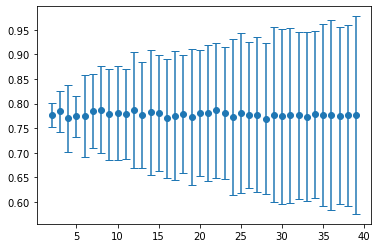

In [42]:
#kroswalidacja dla lda

def test_crossvalidation(clf, wines, m, n):
    kf = RepeatedKFold(n_repeats = m, n_splits = n)
    score = cross_val_score(clf, wines[column_names[0:2]], wines.Classification, cv = kf)
    return score.mean(), score.std()
    
z = np.array([test_crossvalidation(lda, wines, 5, i) for i in range(2, 40)])

plt.errorbar(range(2,40), z[:,0], yerr = z[:,1], fmt="o", capsize=4)

Po skorzystaniu z kroswalidacji otrzymujemy mniejszą precyzję, niz w przypadku ponownego podstawienia (co wiaze sie jednak z overfittingiem dla tego podejscia), sredni blad latwiej okreslic niz w przypadku poprzedniego punktu, gdzie losowo testowaliśmi dwa razy po 0.25 zbioru wejściowego. 